# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

<a id='contents' />

## Proyecto 1

* [1 - Pensando como un/a Data Scientist](#pensando)
* [2 - Análisis Exploratorio de Datos](#eda)
* [3 - Machine Learning](#ml)
    * [3.1 - Filtro outliers consigna Acámica](#filtro-acamica)
        * [3.1.1 - Regresión Lineal](#lineal-aca)
        * [3.1.2 - Árbol de decisión](#arbol-aca)
        * [3.1.3 - K-Vecinos](#knn-aca)
        * [3.1.4 - Evaluación de desempeño](#desempeño-aca)
    * [3.2 - Filtro outliers rango intercuartílico](#filtro-rango)
        * [3.2.1 - Regresión Lineal](#lineal-1)
        * [3.2.2 - Árbol de decisión](#arbol-1)
        * [3.2.3 - K-Vecinos](#knn-1)
        * [3.2.4 - Evaluación de desempeño](#desempeño-1)
    * [3.3 - Filtro outliers ventiles](#filtro-ventiles)
        * [3.3.1 - Regresión Lineal](#lineal-2)
        * [3.3.2 - Árbol de decisión](#arbol-2)
        * [3.3.3 - K-Vecinos](#knn-2)
        * [3.3.4 - Evaluación de desempeño](#desempeño-2)
* [4 - Conclusiones](#conclusiones)

<a id='pensando' />

## 1. Pensando como un/a Data Scientist
[(back to top)](#contents)

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Los datos que nos pueden ayudar son, por un lado, los precios de las propiedades ya que serán nuestra variable target o variable a predecir.

Por otro lado, utilizaremos características de dichas propiedades para entrenar nuestro modelo y generar las predicciones sobre el precio de las mismas. Variables importantes serán:

- Tamaño de las propiedades (m2) 
- Año de construcción 
- Ubicación 
- Cantidad de habitaciones
- Tenencia de patio
- Tenencia de pileta
- Distancia respecto a zonas importantes (parada de metro, centro de la ciudad, atracciones turísticas)
- Fue renovada/restaurada o no

Entre otras

<a id='eda' />

## 2. Análisis Exploratorio de Datos
[(back to top)](#contents)

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor

In [2]:
plt.style.use('ggplot')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
df_properati = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

Observamos cuantas filas y columnas tiene el DataFrame

In [4]:
df_properati.shape

(146660, 19)

Imprimimos las primeras 5 filas

In [5]:
df_properati.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [6]:
df_properati.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

¿Cuántos tipos de propiedad hay publicados?

In [7]:
len(df_properati["property_type"].value_counts())

10

¿Cuántas instancias por cada tipo de propiedad hay?

In [8]:
df_properati["property_type"].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Observamos la misma información mediante gráficos de `seaborn`.

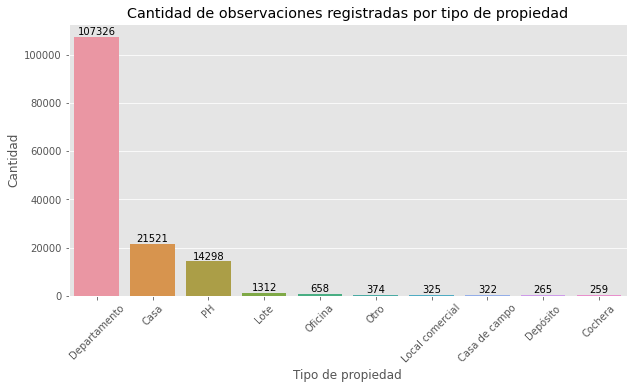

In [9]:
plt.figure(figsize=(10, 5))
barras = sns.countplot(data = df_properati, x = "property_type", order = df_properati["property_type"].value_counts().index)
plt.ylabel("Cantidad")
plt.xlabel("Tipo de propiedad")
plt.xticks(rotation=45)
plt.title("Cantidad de observaciones registradas por tipo de propiedad")
for p in barras.patches:
    barras.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

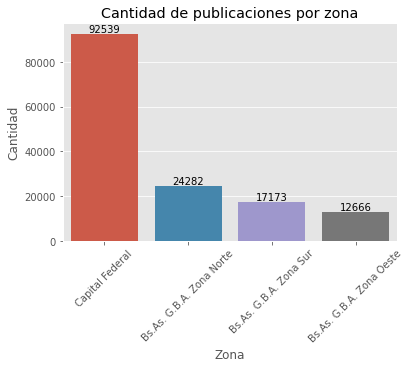

In [10]:
barras = sns.countplot(data = df_properati, x = "l2", order = df_properati["l2"].value_counts().index)
plt.ylabel("Cantidad")
plt.xlabel("Zona")
plt.xticks(rotation=45)
plt.title("Cantidad de publicaciones por zona")
for p in barras.patches:
    barras.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.show()

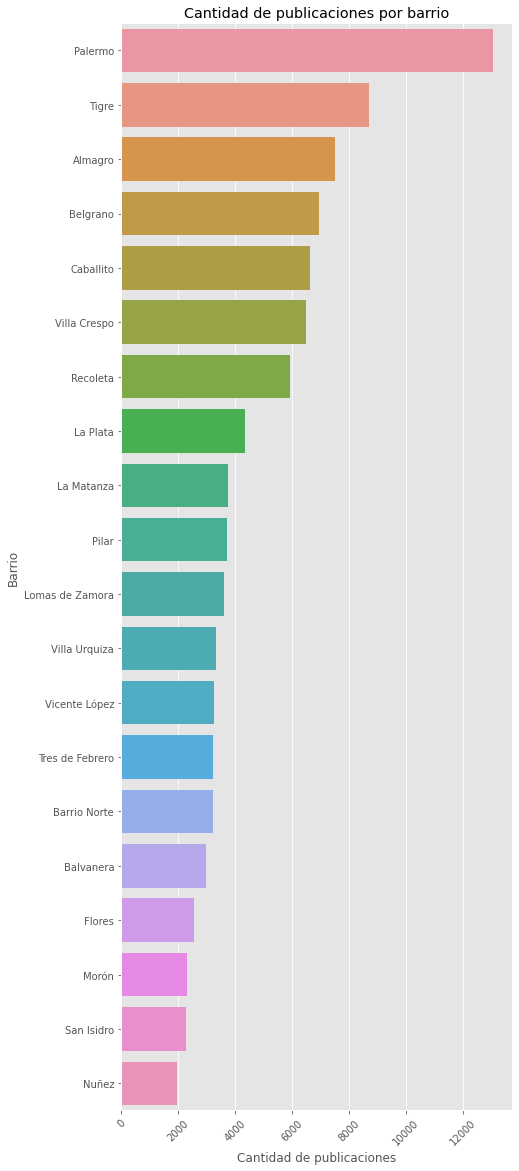

In [11]:
plt.figure(figsize=(7, 20))
barras = sns.countplot(data = df_properati, y = "l3", order = df_properati["l3"].value_counts()[:20].index)
plt.ylabel("Barrio")
plt.xlabel("Cantidad de publicaciones")
plt.xticks(rotation=45)
plt.title("Cantidad de publicaciones por barrio")
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [12]:
df_properati_filtrado = df_properati[(df_properati["property_type"].isin(["Departamento", "Casa", "PH"])) & 
                                     (df_properati["l2"] == "Capital Federal")]

In [13]:
df_properati_filtrado.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

Observamos algunos estadísticos de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price` para tener una primera impresión de cómo se distribuyen.

In [14]:
df_properati_filtrado.iloc[:, 8:14].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Graficamos un boxplot para previsualizar valores atípicos o outliers y luego filtrarlos del dataset.

In [15]:
df_properati_filtrado["price_miles"] = df_properati_filtrado["price"] / 1000

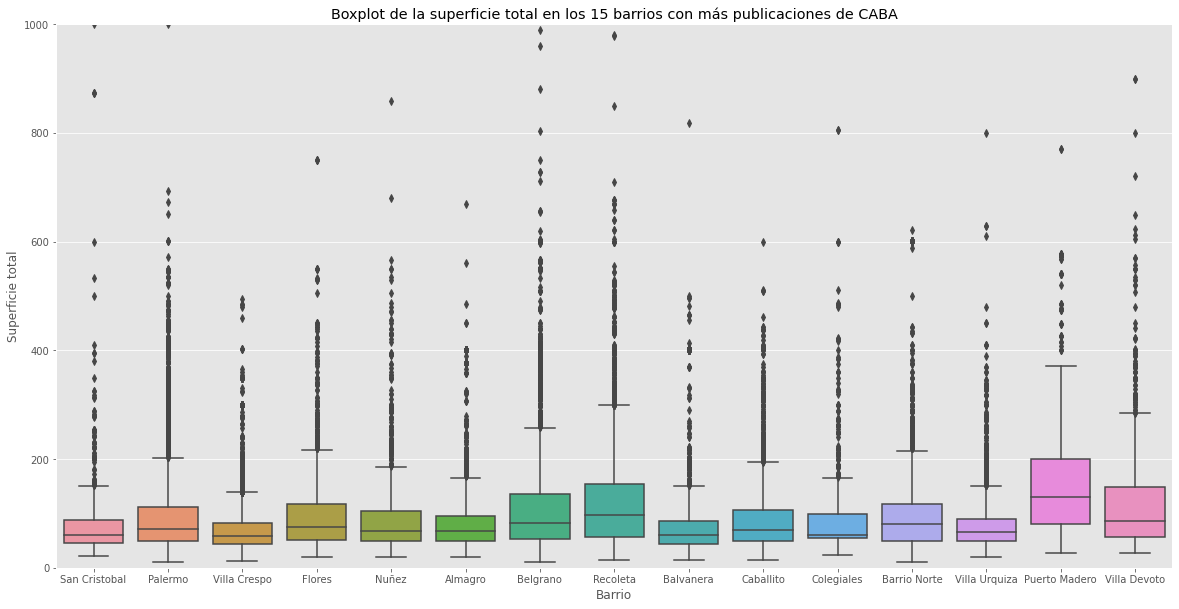

In [16]:
muestra_barrios = df_properati_filtrado["l3"].value_counts()[:15].index

plt.figure(figsize=(20, 10))
sns.boxplot(x = "l3", y = "surface_total", data = df_properati_filtrado[df_properati_filtrado["l3"].isin(muestra_barrios)])
plt.title("Boxplot de la superficie total en los 15 barrios con más publicaciones de CABA")
plt.xlabel("Barrio")
plt.ylabel("Superficie total")
plt.ylim(0, 1000)
plt.show()

### Filtro outliers 1: rango intercuartílico

In [17]:
for i in ["price", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]:
    q1, q3 = df_properati_filtrado[i].quantile(0.25), df_properati_filtrado[i].quantile(0.75)
    rango_interc = q3 - q1
    
    upper = q3 + 1.5 * rango_interc
    lower = q1 - 1.5 * rango_interc
    
    df_properati_filtro1 = df_properati_filtrado[(df_properati_filtrado[i] > lower) & 
                                                 (df_properati_filtrado[i] < upper)]

In [18]:
# q1, q3 = df_properati_filtrado['surface_total'].quantile(0.25), df_properati_filtrado['surface_total'].quantile(0.75)

In [19]:
# rango_interc = q3 - q1

In [20]:
# upper = q3 + 1.5 * rango_interc
# lower = q1 - 1.5 * rango_interc

In [21]:
# df_properati_filtro1 = df_properati_filtrado[(df_properati_filtrado["surface_total"] > lower) & 
#                                               (df_properati_filtrado["surface_total"] < upper)]

### Filtro outliers 2: pd.qcut

Como se puede observar, existen muchos outliers en la variable `surface_total`. Dado esto, se procede a eliminar valores extremos con la función `qcut` de pandas.

In [22]:
pd.qcut(df_properati_filtrado["surface_total"], 20, precision = 0, labels = np.arange(1, 21, 1)).value_counts().sort_index()

1     4375
2     4728
3     4060
4     3474
5     4150
6     4028
7     4092
8     4406
9     4258
10    4062
11    4202
12    4234
13    4000
14    4431
15    3554
16    4120
17    4148
18    4034
19    4207
20    4005
Name: surface_total, dtype: int64

In [23]:
for i in ["price", "surface_total", "surface_covered"]:
    df_properati_filtrado["ventil"] = pd.qcut(df_properati_filtrado[i], 20, 
                                              precision = 0, 
                                              labels = np.arange(1, 21, 1))
    df_properati_filtro2 = df_properati_filtrado[~df_properati_filtrado["ventil"].isin([19, 20])]

No se aplica el filtro 2 para el resto de las variables ya que su dimensionalidad no lo amerita

Filtramos los registros con valores de `surface_covered`superiores a `surface_total`. Para ambos tipos de filtrado.

In [24]:
df_properati_filtro1 = df_properati_filtrado[df_properati_filtrado["surface_covered"] <= df_properati_filtrado["surface_total"]]

In [25]:
df_properati_filtro2 = df_properati_filtrado[df_properati_filtrado["surface_covered"] <= df_properati_filtrado["surface_total"]]

Hacemos unos boxplots para las variables ya filtradas

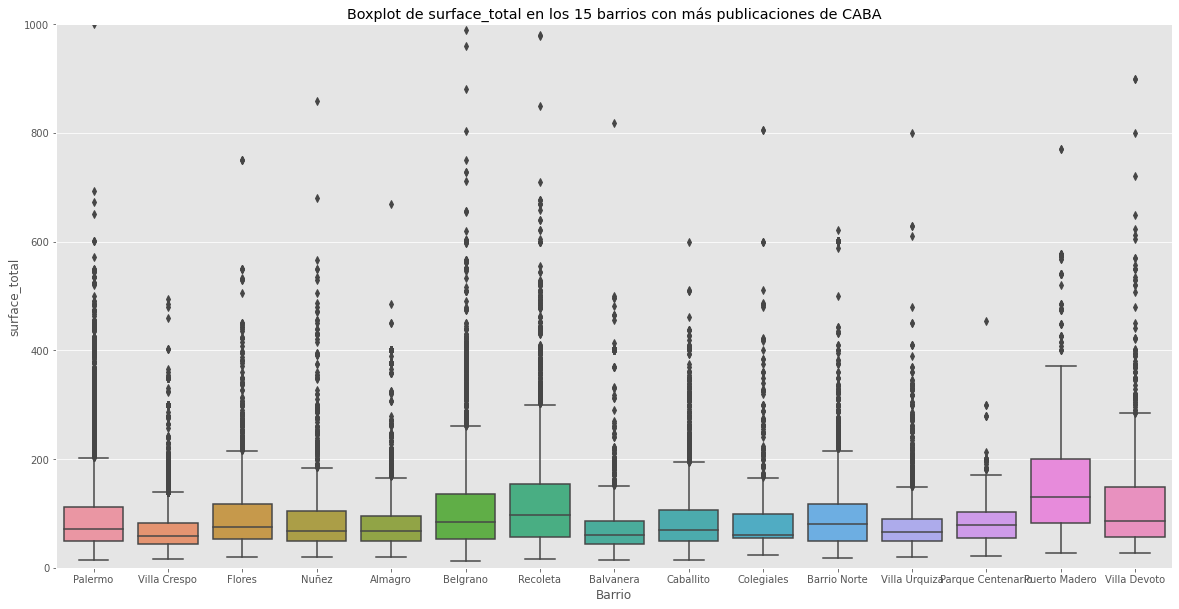

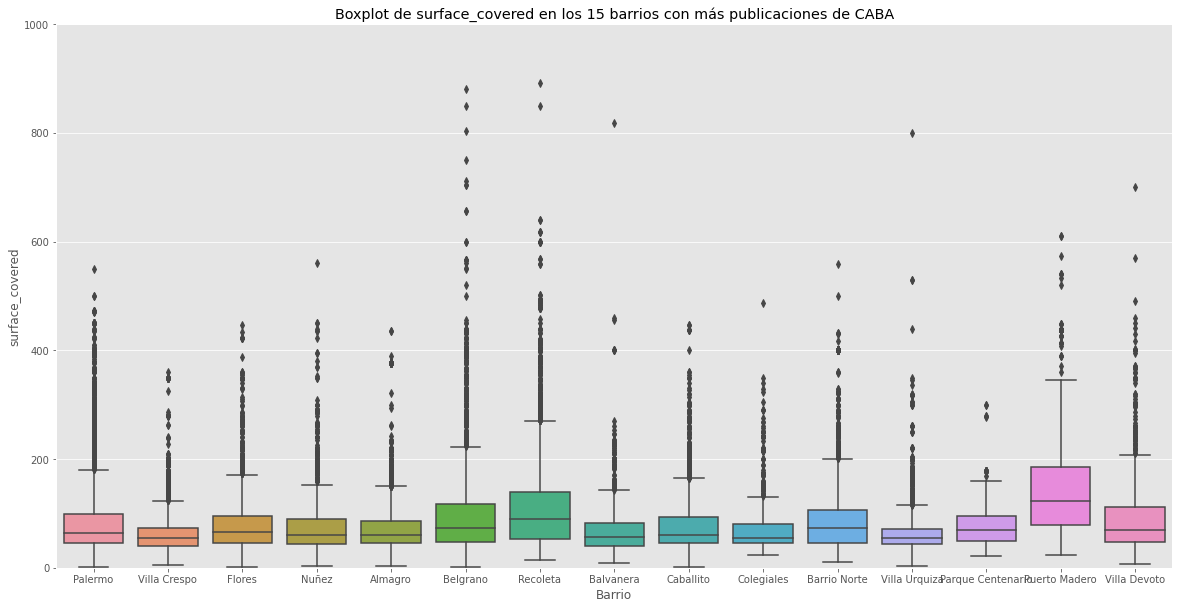

In [26]:
for i in ["surface_total", "surface_covered"]:
    muestra_barrios = df_properati_filtro1["l3"].value_counts()[:15].index

    plt.figure(figsize=(20, 10))
    sns.boxplot(x = "l3", y = i, data = df_properati_filtro1[df_properati_filtro1["l3"].isin(muestra_barrios)])
    plt.title("Boxplot de {} en los 15 barrios con más publicaciones de CABA".format(i))
    plt.xlabel("Barrio")
    plt.ylabel(i)
    plt.ylim(0, 1000)
    plt.show()

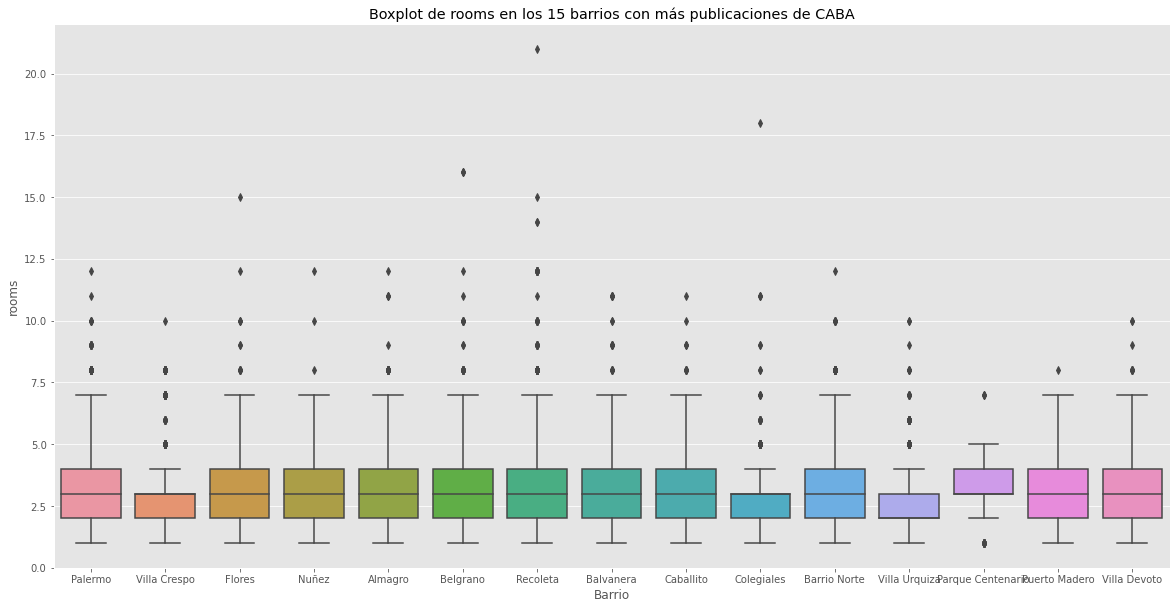

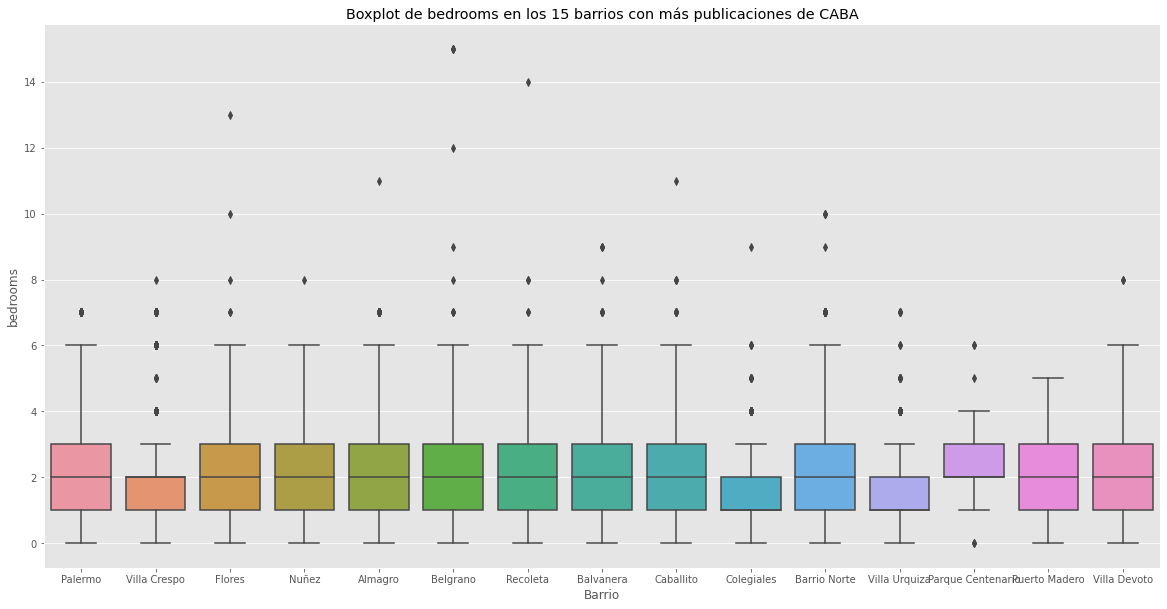

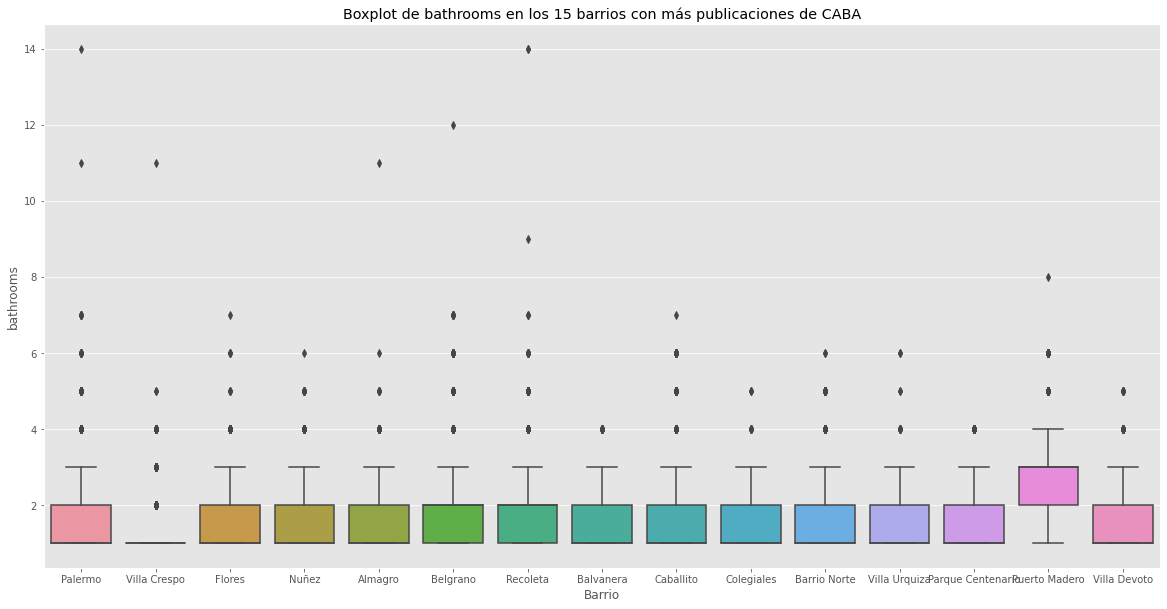

In [27]:
for i in ["rooms", "bedrooms", "bathrooms"]:
    muestra_barrios = df_properati_filtro1["l3"].value_counts()[:15].index

    plt.figure(figsize=(20, 10))
    sns.boxplot(x = "l3", y = i, data = df_properati_filtro1[df_properati_filtro1["l3"].isin(muestra_barrios)])
    plt.title("Boxplot de {} en los 15 barrios con más publicaciones de CABA".format(i))
    plt.xlabel("Barrio")
    plt.ylabel(i)
    plt.show()

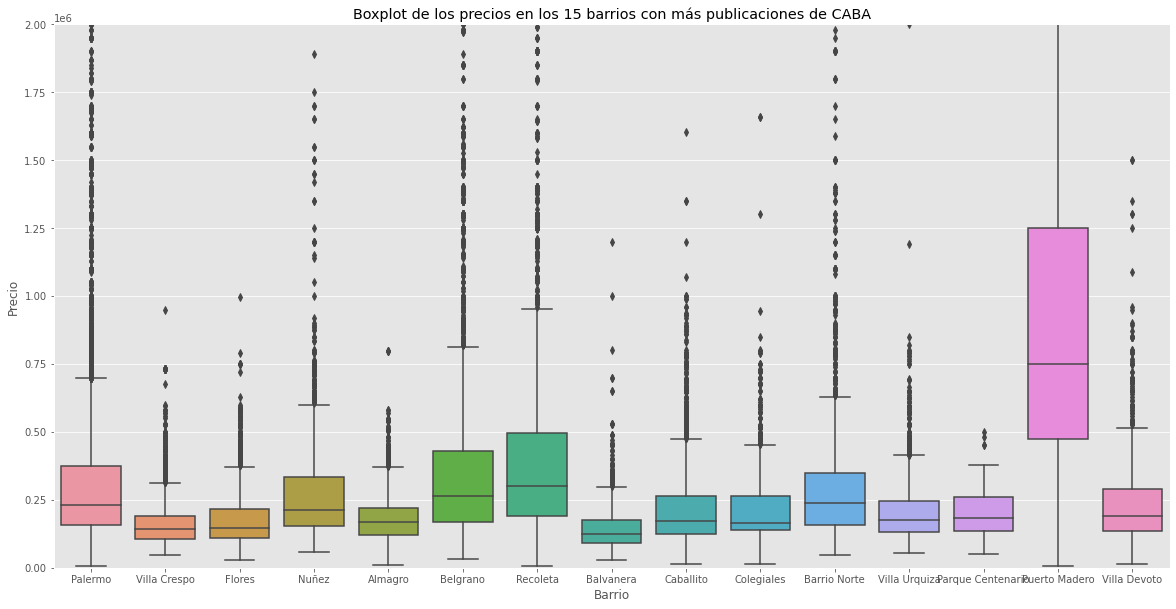

In [28]:
muestra_barrios = df_properati_filtro1["l3"].value_counts()[:15].index

plt.figure(figsize=(20, 10))
sns.boxplot(x = "l3", y = "price", data = df_properati_filtro1[df_properati_filtro1["l3"].isin(muestra_barrios)])
plt.title("Boxplot de los precios en los 15 barrios con más publicaciones de CABA")
plt.xlabel("Barrio")
plt.ylabel("Precio")
plt.ylim(0, 2000000)
plt.show()

Utilizamos la función `pairplot` de Seaborn

In [29]:
df_properati_filtro1.drop(["price_miles", "ventil"], axis = 1, inplace = True)

In [30]:
df_properati_filtro2.drop(["price_miles", "ventil"], axis = 1, inplace = True)

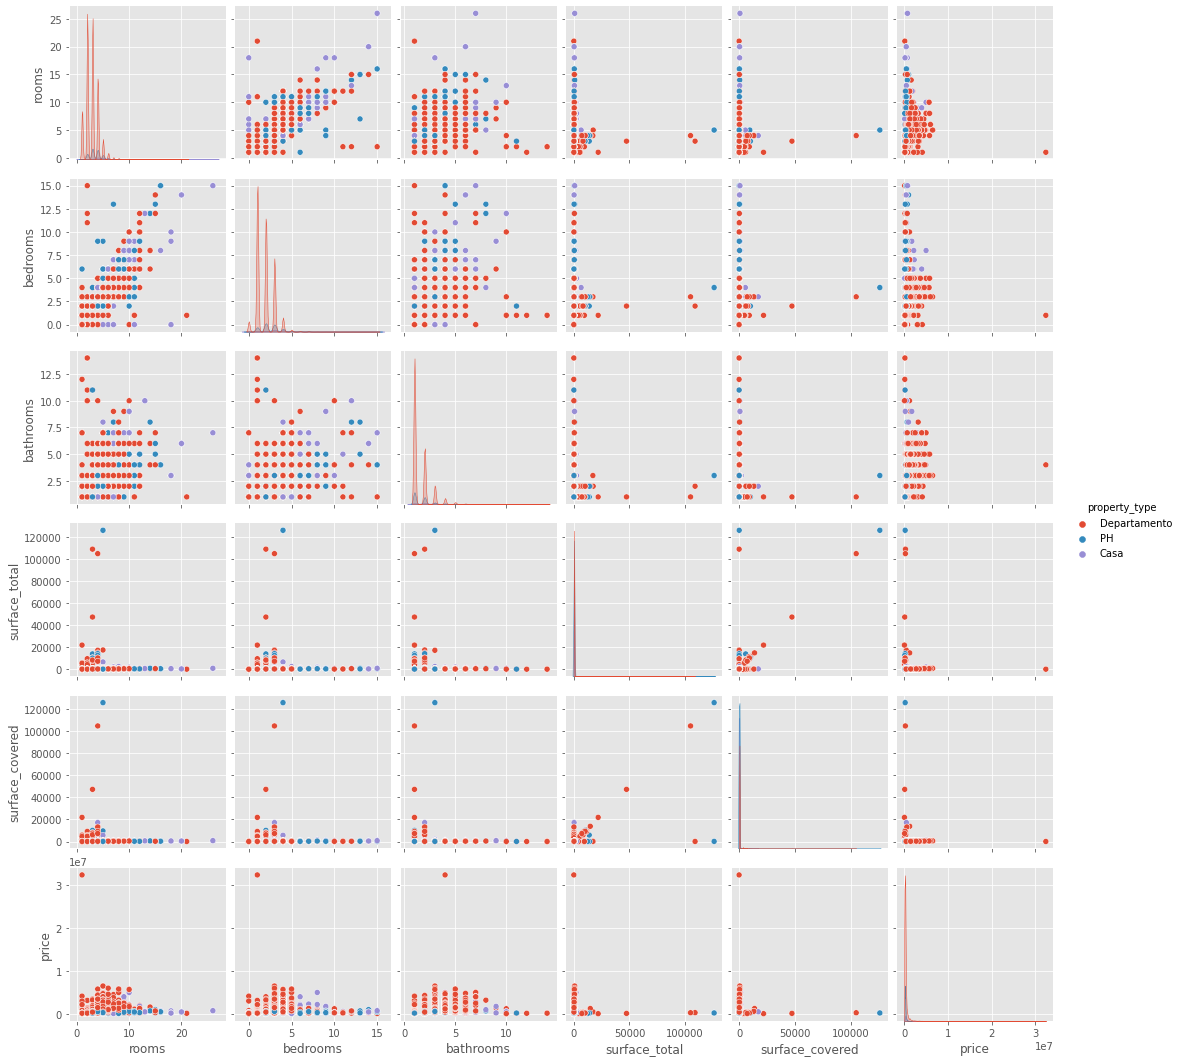

In [31]:
sns.pairplot(df_properati_filtrado[["rooms", "bedrooms", 
                                    "bathrooms", "surface_total", 
                                    "surface_covered", "price", "property_type"]], hue = "property_type")
plt.show()

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

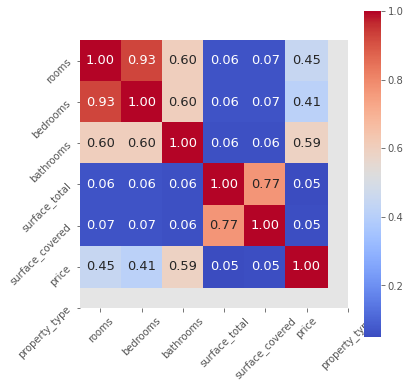

In [32]:
df_corr = df_properati_filtrado[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", 
                                 "price", "property_type"]]

corr = df_corr.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 13},
           xticklabels= df_corr.columns, 
           yticklabels= df_corr.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [33]:
df_properati_filtrado[["l3", 
                       "price_miles"]].groupby("l3").mean().reset_index().sort_values("price_miles", ascending = False).head(5)

,l3,price_miles
34,Puerto Madero,985.202210
19,Las Cañitas,469.488155
35,Recoleta,410.003825
6,Belgrano,377.029863
26,Palermo,354.744485


### 2.2 Visualización geolocalizada

In [34]:
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [35]:
shp_caba = gpd.read_file("barrios\\barrios_badata.shp")

In [36]:
shp_caba["BARRIO"] = shp_caba["BARRIO"].str.title()

In [37]:
shp_caba.rename(columns = {"BARRIO": "Barrio"}, inplace = True)

In [38]:
df_properati_filtro1.rename(columns = {"l3": "Barrio"}, inplace = True)

In [39]:
df_properati_filtro1["Barrio"] = df_properati_filtro1["Barrio"].str.upper()

In [40]:
df_properati_filtro1['Barrio'] = df_properati_filtro1['Barrio'].replace({"ABASTO": "ALMAGRO",
                                         "BARRIO NORTE": "RECOLETA",
                                         "LAS CAÑITAS": "PALERMO",
                                         "CATALINAS": "RETIRO"})

df_properati_filtro1['Barrio'] = df_properati_filtro1['Barrio'].replace({"CENTRO / MICROCENTRO": "SAN NICOLÁS",
                                         "CONGRESO": "BALVANERA",
                                         "ONCE": "BALVANERA",
                                         "PARQUE CENTENARIO": "CABALLITO", 
                                         "POMPEYA":"NUEVA POMPEYA",
                                         "TRIBUNALES":"SAN NICOLÁS",
                                         "VILLA GENERAL MITRE":"VILLA GRAL. MITRE"})

In [41]:
df_properati_filtro1["Barrio"] = df_properati_filtro1["Barrio"].replace({"VILLA PUEYRREDÓN": "VILLA PUEYRREDON", 
                                            "SAN NICOLÁS": "SAN NICOLAS",
                                            "CONSTITUCIÓN": "CONSTITUCION",
                                            "AGRONOMÍA": "AGRONOMIA"})

In [42]:
df_properati_filtro1["Barrio"] = df_properati_filtro1["Barrio"].str.title()

In [43]:
df_properati_filtro1["price_m2"] = df_properati_filtro1["price"] / df_properati_filtro1["surface_total"]

In [44]:
df_properati_mapa = df_properati_filtro1.groupby("Barrio").mean().reset_index()[["Barrio", "price_m2"]]

In [45]:
merged_caba = shp_caba.set_index("Barrio").join(df_properati_mapa.set_index("Barrio")).reset_index()

In [46]:
merged_caba.head(2)

,Barrio,COMUNA,PERIMETRO,AREA,OBJETO,geometry,price_m2
0,Chacarita,15.0,7724.852955,3.115707e+06,BARRIO,"POLYGON ((100961.338 103691.974, 100884.721 10...",2412.759480
1,Paternal,15.0,7087.513295,2.229829e+06,BARRIO,"POLYGON ((99791.104 103628.888, 99787.132 1036...",2084.764256


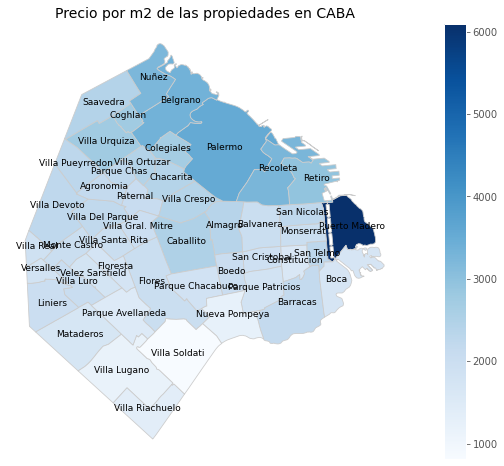

In [47]:
fig, ax = plt.subplots(1, figsize = (15, 8))

merged_caba.plot(column = "price_m2", cmap = "Blues", linewidth = 0.8, ax = ax, edgecolor = "0.8")

ax.axis("off")
ax.set_title("Precio por m2 de las propiedades en CABA", fontdict = {"fontsize": "14", "fontweight" : "3"})

sm = plt.cm.ScalarMappable(cmap = "Blues", 
                           norm = plt.Normalize(df_properati_mapa["price_m2"].min(), 
                                                df_properati_mapa["price_m2"].max()))
sm._A = []
cbar = fig.colorbar(sm)

merged_caba['coords'] = merged_caba['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_caba['coords'] = [coords[0] for coords in merged_caba['coords']]

for idx, row in merged_caba.iterrows():
    if(row['price_m2'] > 0):
        plt.annotate(s=row['Barrio'], xy=(row['coords']),
                 horizontalalignment='center',  color='black', wrap=True, fontsize=9)

plt.show()

<a id='ml' />

## 3. Machine Learning
[(back to top)](#contents)

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

## Uso de métricas de evaluación

Se utilizará cómo métrica de evaluación el RMSE ya que se considera apropiada dada el problema en cuestión. Nos servirá para evaluar cuán desviados se encuentran dos conjuntos de datos (train y test en nuestro caso) midiendo tanto los desvíos positivos como negativos, ya que trabaja con los cuadrados de los errores.

Es una de las métricas más utilizadas en regresión y predicción de variables

<a id='filtro-acamica' />

## 3.1 - Filtro consigna Acámica
[(back to top)](#contents)

En una primera instancia vamos a filtrar el dataset siguiendo las consignas establecidas por Acámica

In [48]:
df_nuevo = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [49]:
df_nuevo = df_nuevo[(df_nuevo["l2"] == "Capital Federal") &
                    (df_nuevo["property_type"].isin(["Departamento", "PH", "Casa"])) & 
                    (df_nuevo["surface_total"] <= 1000) & 
                    (df_nuevo["surface_total"] >= 15) &
                    (df_nuevo["price"] <= 4000000)]

In [50]:
df_nuevo = df_nuevo[["l3", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

In [51]:
df_nuevo.isna().sum()

l3                   0
rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64

In [52]:
df_nuevo = df_nuevo[~df_nuevo["bathrooms"].isna()]

In [53]:
df_nuevo = df_nuevo[~df_nuevo["surface_covered"].isna()]

In [54]:
df_nuevo.shape

(81019, 7)

Defino los conjuntos test y train

In [55]:
X, y = df_nuevo.drop(["l3", "price"], axis = 1), df_nuevo["price"]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

Defino una función que luego me servirá para evaluar y optimizar los modelos

In [58]:
def eval_hyperparams(modelo, hiperparametro, plot = True):
    hyper_list = np.arange(1,20)

    rmse_train = []
    rmse_test = []
    rmse_diff = []

    for i in hyper_list:
        if modelo == DecisionTreeRegressor:
            model = modelo(max_depth = i)
            
        elif modelo == KNeighborsRegressor:
            model = modelo(n_neighbors = i)
        
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        diff = test - train

        rmse_train.append(train)
        rmse_test.append(test)
        rmse_diff.append(diff)
        
    plt.figure(figsize = (10, 6))
    plt.plot(rmse_train, label = "RMSE Train", )
    plt.plot(rmse_test, label = "RMSE Test")
    plt.plot(rmse_diff, label = "RMSE Diff Test-Train")
    plt.legend()
    plt.ylabel("RMSE")
    plt.xlabel("Max depth")
    plt.show()

<a id='lineal-aca' />

### 3.1.1 - Regresión Lineal
[(back to top)](#contents)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
linear_model = LinearRegression()

In [61]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [62]:
print(linear_model.coef_, linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807939719


<a id='arbol-aca' />

### 3.1.2 - Árbol de decisión
[(back to top)](#contents)

Optimización de hiperparámetros

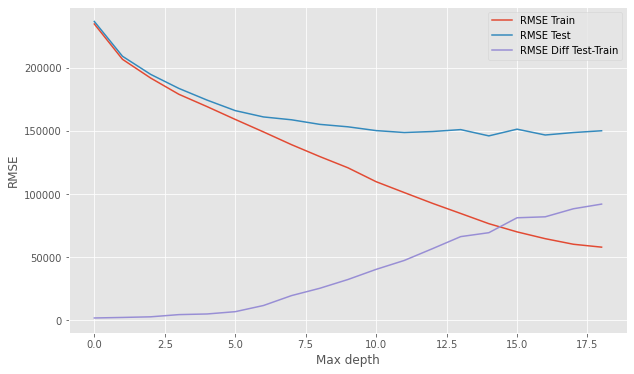

In [63]:
eval_hyperparams(DecisionTreeRegressor, "max_depth")

Se puede observar que el menor RMSE considerando que no haya overfitting se da en `max_depth` = 5

In [64]:
tree_regressor_opt = DecisionTreeRegressor(max_depth = 5,
                                           max_features = "auto",
                                           min_samples_leaf = 3,
                                           min_samples_split = 12,
                                           random_state = 123)

In [65]:
tree_regressor_opt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=3,
                      min_samples_split=12, random_state=123)

<a id='knn-aca' />

### 3.1.3 - K-Vecinos
[(back to top)](#contents)

In [66]:
knn_regressor = KNeighborsRegressor(n_jobs = 1)

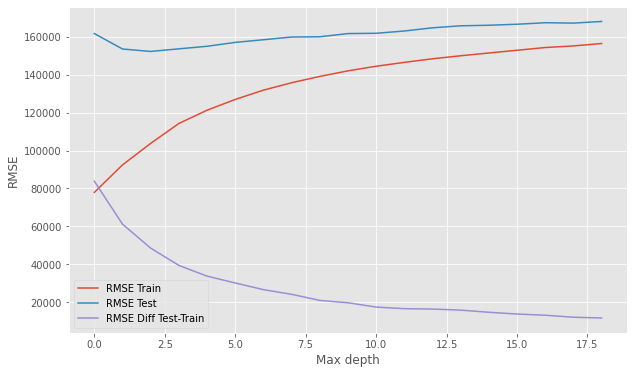

In [67]:
eval_hyperparams(KNeighborsRegressor, "n_neighbors")

Una óptima cantidad de vecinos puede ser 4 ya que en ese punto es donde el fitting se empieza a aplanar, es decir, deja de haber overfitting y es el punto donde hay menor RMSE sin incurrir en overfitting.

In [68]:
knn_regressor_opt = KNeighborsRegressor(n_neighbors = 4,
                                        leaf_size = 1,
                                        weights = "distance",
                                        algorithm = "auto",
                                        n_jobs = 1)

In [69]:
knn_regressor_opt.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=1, n_jobs=1, n_neighbors=4, weights='distance')

<a id='desempeño-aca' />

### 3.1.4 - Evaluación de desempeño
[(back to top)](#contents)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361587


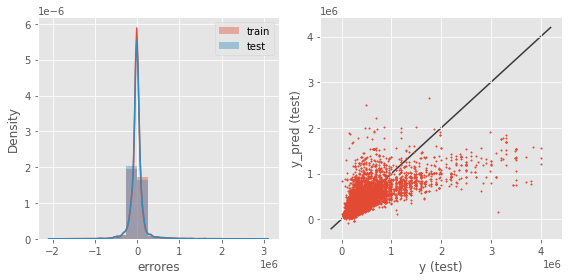

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 169200.1754118897
Raíz del error cuadrático medio en Test: 174352.7367379676


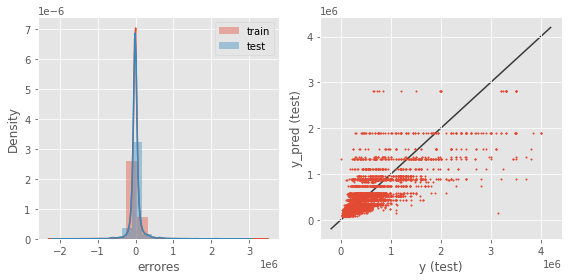

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 56503.24301686958
Raíz del error cuadrático medio en Test: 141814.47381098755


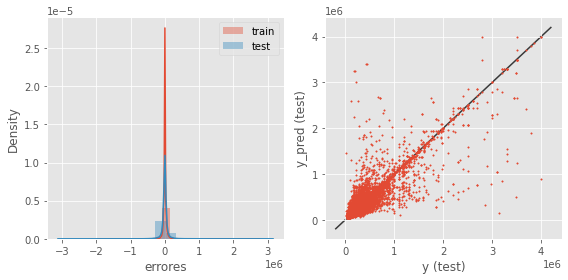

In [70]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor_opt, knn_regressor_opt]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

<a id='filtro-rango' />

## 3.2 - Filtro rango intercuartílico
[(back to top)](#contents)

En esta segunda sección se filtran los outliers utilizando el rango intercuartílico, el resto de los filtros son los aplicados en la sección 2 del notebook

In [71]:
df_properati_filtro1 = df_properati_filtro1.dropna()

In [72]:
X, y = df_properati_filtro1[["rooms", "bedrooms", 
                             "bathrooms", "surface_total", "surface_covered"]], df_properati_filtro1["price"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

<a id='lineal-1' />

### 3.2.1 - Regresión Lineal
[(back to top)](#contents)

In [74]:
linear_model = LinearRegression()

In [75]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [76]:
print(linear_model.coef_, linear_model.intercept_)

[ 8.37331337e+04 -6.91265568e+04  1.99604414e+05  1.29092564e+00
  1.00302373e+01] -162088.04146349384


<a id='arbol-1' />

### 3.2.2 Árbol de decisión
[(back to top)](#contents)

Optimización de hiperparámetros

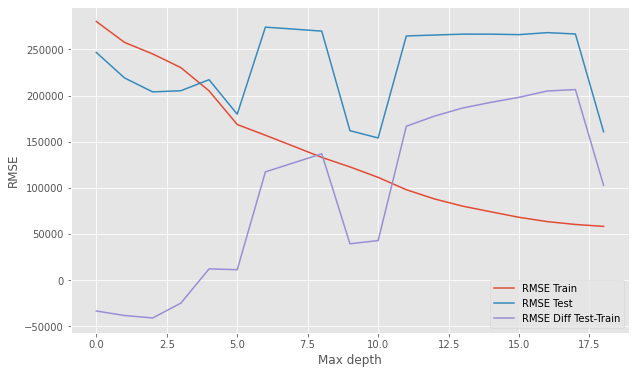

In [77]:
eval_hyperparams(DecisionTreeRegressor, "max_depth")

Se puede observar que el menor RMSE considerando que no haya overfitting se da en `max_depth` = 3

In [78]:
tree_regressor_opt = DecisionTreeRegressor(max_depth = 3,
                                           max_features = "auto",
                                           min_samples_leaf = 1,
                                           min_samples_split = 10,
                                           random_state = 123)

In [79]:
tree_regressor_opt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features='auto', min_samples_split=10,
                      random_state=123)

<a id='knn-1' />

### 3.2.3 - K-Vecinos
[(back to top)](#contents)

Optimización de hiperparámetros

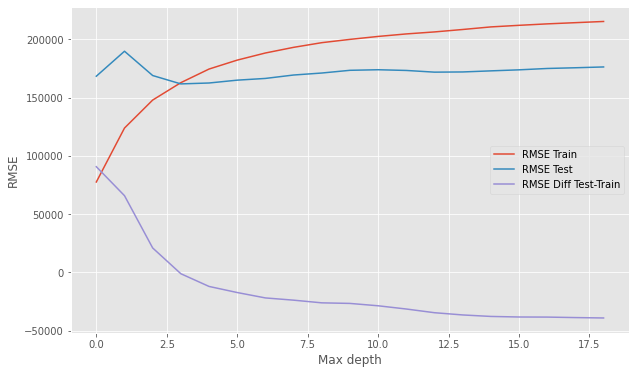

In [80]:
eval_hyperparams(KNeighborsRegressor, "n_neighbors")

Una óptima cantidad de vecinos puede ser 3 ya que en ese punto es donde el fitting se empieza a aplanar, es decir, deja de haber overfitting y es el punto donde hay menor RMSE sin incurrir en overfitting.

In [81]:
knn_regressor_opt = KNeighborsRegressor(n_neighbors = 3,
                                        leaf_size = 2,
                                        weights = "distance",
                                        algorithm = "ball_tree",
                                        n_jobs = 1)

In [82]:
knn_regressor_opt.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=2, n_jobs=1, n_neighbors=3,
                    weights='distance')

<a id='desempeño-1' />

### 3.2.4 Evaluación de desempeño
[(back to top)](#contents)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 271237.4621705183
Raíz del error cuadrático medio en Test: 239143.58643888563


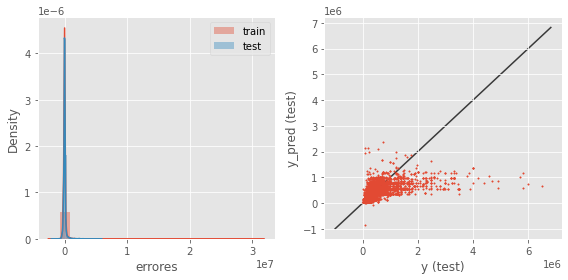

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 245129.69262786777
Raíz del error cuadrático medio en Test: 203960.5379820169


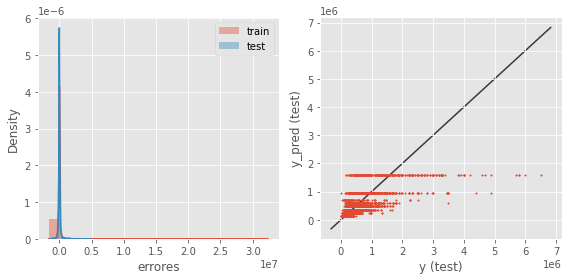

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 69214.9221356027
Raíz del error cuadrático medio en Test: 160755.58171403917


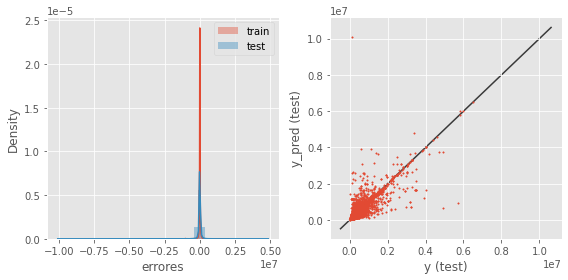

In [83]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor_opt, knn_regressor_opt]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

<a id='filtro-ventil' />

## 3.3 - Filtro con ventiles
[(back to top)](#contents)2

Por último, se filtra el dataset diviendo a las variables `surface_total`y `prices`en ventiles según su distribución. Luego se procede a eliminar los ventiles 19 y 20 para eliminar valores atípicos.

In [84]:
df_properati_filtro2 = df_properati_filtro2.dropna()

In [85]:
X, y = df_properati_filtro2[["rooms", "bedrooms", 
                             "bathrooms", "surface_total", "surface_covered"]], df_properati_filtro2["price"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

<a id='lineal-2' />

### 3.3.1 - Regresión Lineal
[(back to top)](#contents)

In [87]:
linear_model = LinearRegression()

In [88]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [89]:
print(linear_model.coef_, linear_model.intercept_)

[ 8.37331337e+04 -6.91265568e+04  1.99604414e+05  1.29092564e+00
  1.00302373e+01] -162088.04146349384


<a id='arbol-2' />

### 3.3.2 - Árbol de decisión
[(back to top)](#contents)

Optimización de hiperparámetros

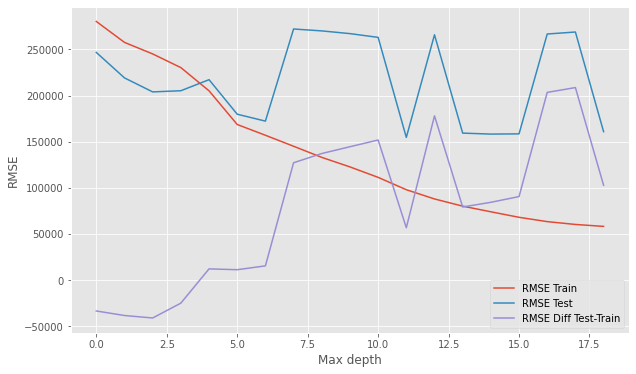

In [90]:
eval_hyperparams(DecisionTreeRegressor, "max_depth")

Se puede observar que el menor RMSE considerando que no haya overfitting se da en `max_depth` = 3

In [91]:
tree_regressor_opt = DecisionTreeRegressor(max_depth = 3,
                                           max_features = "auto",
                                           min_samples_leaf = 9,
                                           min_samples_split = 2,
                                           random_state = 123)

In [92]:
tree_regressor_opt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features='auto', min_samples_leaf=9,
                      random_state=123)

<a id='knn-2' />

### 3.3.3 - K-Vecinos
[(back to top)](#contents)

Optimización de hiperparámetros

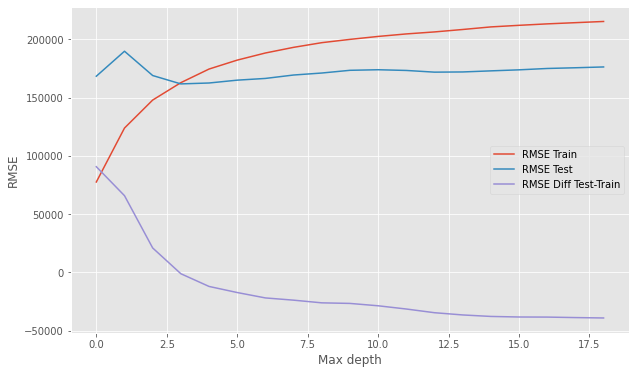

In [93]:
eval_hyperparams(KNeighborsRegressor, "n_neighbors")

Una óptima cantidad de vecinos puede ser 3 ya que en ese punto es donde el fitting se empieza a aplanar, es decir, deja de haber overfitting y es el punto donde hay menor RMSE sin incurrir en overfitting.

In [94]:
knn_regressor_opt = KNeighborsRegressor(n_neighbors = 3,
                                        leaf_size = 3,
                                        weights = "distance",
                                        algorithm = "ball_tree",
                                        n_jobs = 1)

In [95]:
knn_regressor_opt.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=3, n_jobs=1, n_neighbors=3,
                    weights='distance')

<a id='desempeño-2' />

### 3.3.4 - Evaluación de desempeño
[(back to top)](#contents)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 271237.4621705183
Raíz del error cuadrático medio en Test: 239143.58643888563


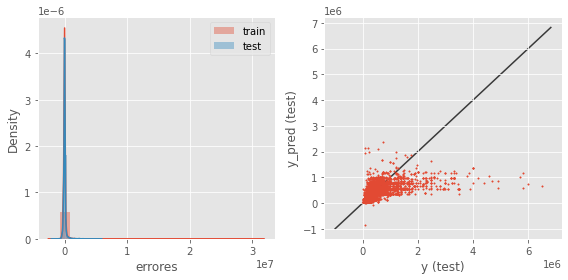

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 245129.69262786777
Raíz del error cuadrático medio en Test: 203960.5379820169


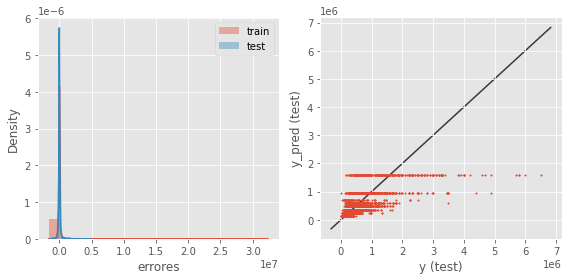

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 69214.9221356027
Raíz del error cuadrático medio en Test: 160755.58171403917


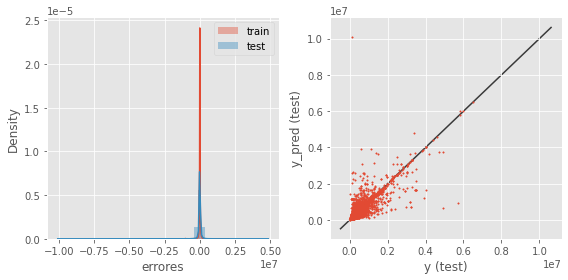

In [96]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor_opt, knn_regressor_opt]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

<a id='conclusiones' />

## 4. Conclusiones
[(back to top)](#contents)

En una primera instancia se procede siguiendo las consignas de Acámica en cuanto al filtrado de los datos. Así se obtiene un modelo optimizado de k-vecinos más cercanos con las siguientes métricas de desempeño:

- Raíz del error cuadrático medio en Train: 56503.24301686958
- Raíz del error cuadrático medio en Test: 141814.47381098755

Luego, se analizan dos filtrados diferentes. En un primer lugar, se filtran los outliers mediante el rango intercuartílico y por último, se divide la distriución de tres variables (`prices`, `surface_covered` y `surface_total`) en ventiles para luego eliminar los dos últimos en concepto de ouliers.

El resultado obtenido es un modelo de k-vecinos más cercanos con las siguientes métricas de desempeño:

- Raíz del error cuadrático medio en Train: 69214.9221356027
- Raíz del error cuadrático medio en Test: 160755.58171403917

Claramente obtuvimos mejores resultados con el filtrado tradicional. Cabe destacar que estas métricas se obtienen con el filtrado mediante las consignas de Acámica (sección 3.1 del noteobok).


Por último, se muestra un mapa con los precios promedios por m2 en cada barrio de CABA. En el panel izquierdo se presentan los precios reales mientras que a la derecha, los precios predichos por nuestro modelo optimizado de k-vecinos más cercanos con el filtrado por ventiles

Definimos nuestro set de datos a utilizar

In [97]:
X, y = df_properati_filtro2[["rooms", "bedrooms", 
                             "bathrooms", "surface_total", "surface_covered"]], df_properati_filtro2["price"]

Separamos en train y test

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

Instanciamos el modelo

In [99]:
knn_regressor = KNeighborsRegressor(n_jobs = 1)

Ya con los hiperparámetros optimizados, entrenamos el modelo

In [100]:
knn_regressor_opt = KNeighborsRegressor(n_neighbors = 8,
                                        leaf_size = 3,
                                        weights = "distance",
                                        algorithm = "ball_tree",
                                        n_jobs = 1)

In [101]:
knn_regressor_opt.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=3, n_jobs=1, n_neighbors=8,
                    weights='distance')

Generamos las predicciones sobre todo el conjunto de datos

In [102]:
y_pred = knn_regressor_opt.predict(X)

In [103]:
y_pred.shape

(76214,)

Creamos un DataFrame con los barrios y las predicciones

In [104]:
df_pred_caba = pd.DataFrame({"Barrio": df_properati_filtro2["l3"],
                             "Sup": df_properati_filtro2["surface_total"],
                             "Precio_pred": y_pred})

Creamos la variable precio por m2

In [105]:
df_pred_caba["Precio_m2_pred"] = df_pred_caba["Precio_pred"] / df_pred_caba["Sup"]

Elimino variables que no me sirven más

In [106]:
df_pred_caba.drop(["Sup", "Precio_pred"], axis = 1, inplace = True)

Calculo el precio promedio por m2 para cada barrio de CABA

In [107]:
df_pred_caba_mean = df_pred_caba.groupby("Barrio").mean().reset_index()

Hago un replace debido a que hay diferencias en los nombres de los barrios entre el dataset de Properati y el shapefile

In [108]:
df_pred_caba_mean["Barrio"] = df_pred_caba_mean["Barrio"].replace({"Villa del Parque": "Villa Del Parque", 
                                                                   "Constitución": "Constitucion",
                                                                   "Villa General Mitre": "Villa Gral. Mitre",
                                                                   "Agronomía": "Agronomia",
                                                                   "Villa Pueyrredón": "Villa Pueyrredon",
                                                                   "Pompeya": "Nueva Pompeya",
                                                                   "San Nicolás": "San Nicolas"})

Junto el dataset con los precios y el shapefile

In [109]:
merged_caba_pred = shp_caba.set_index("Barrio").join(df_pred_caba_mean.set_index("Barrio")).reset_index().fillna(0)

Muestro el mapa

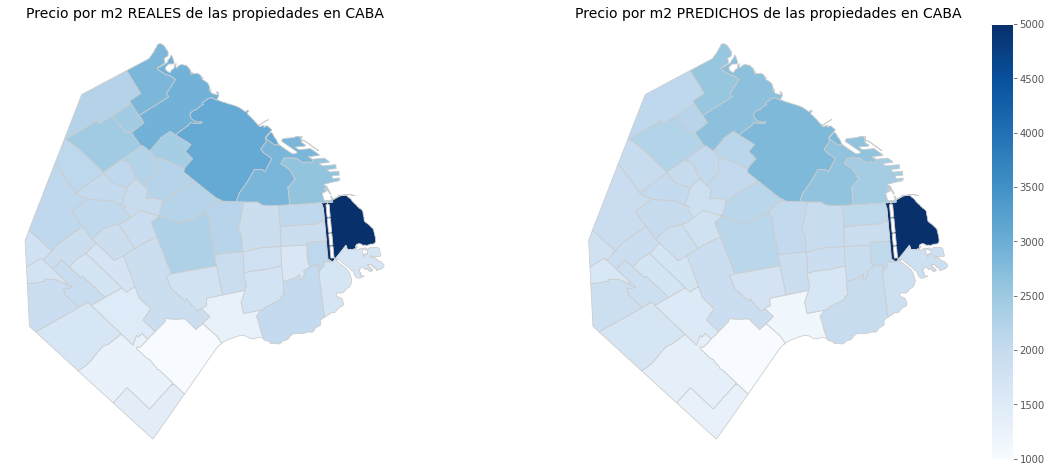

In [110]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

merged_caba.plot(column = "price_m2", cmap = "Blues", linewidth = 0.8, ax = ax[0], edgecolor = "0.8")

ax[0].axis("off")
ax[0].set_title("Precio por m2 REALES de las propiedades en CABA", fontdict = {"fontsize": "14", "fontweight" : "3"})

merged_caba_pred.plot(column = "Precio_m2_pred", cmap = "Blues", linewidth = 0.8, ax = ax[1], edgecolor = "0.8")

ax[1].axis("off")
ax[1].set_title("Precio por m2 PREDICHOS de las propiedades en CABA", fontdict = {"fontsize": "14", "fontweight" : "1"})

sm = plt.cm.ScalarMappable(cmap = "Blues", 
                           norm = plt.Normalize(1000, 5000))
sm._A = []
cbar = fig.colorbar(sm)

plt.show()

Como se puede observar, las predicciones de las zonas sur y norte son más que aceptables. Por otro lado, en la zona centro de CABA se encuentran los principales desvíos.

La zona centro contiene las propiedades con precios en el medio de la distribución (de precios, no geográfica). Debido a esto se debe enfocar con mayor profundidad en este rango de precios para afinar las predicciones.

## Mejoras y próximos pasos

Para la próxima entrega creo conveniente realizar la optimización de hiperparámetros con alguna metodología más completa como puede ser GridSearch o RandomSearch. Además de ello, se debe realizar el encoding de variables categóricas para así poder captar mayor variabilidad en los datos incorporando estos features, o al menos, evaluarlas y decidir si finalmente están aportando a los modelos o no.

Por último, de ser posible, me gustaría aplicar algún modelo de ensamble cómo por ejemplo XGBoost, Adaboost o LightGBM para así ir incorporando modelos más asertivos para el problema en cuestión.